In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('global-data-on-sustainable-energy.csv')

In [3]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [4]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

# Phase 1: Understanding the Grid (Data Cleaning)

## 1. You inspect how many observations are available and confirm the shape.

In [5]:
print(f'The number of observations are: {len(df)}')
print(f'The shape of the data is: {df.shape}')

The number of observations are: 3649
The shape of the data is: (3649, 21)


#### Interpretation: We can see from the data that there are 3649 rows and 21 columns

## 2. To determine processing strategy, you check how many columns are numeric vs categorical.

In [6]:
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

print(f'Numeric columns: {len(numeric_cols)}')
print(f'Categorical columns: {len(categorical_cols)}')

Numeric columns: 19
Categorical columns: 2


#### There are 19 numeric columns and 2 categorical columns

## 3. You standardize messy column names into snake_case to improve code readability.

In [7]:
import re

def to_snake_case_clean_brackets(col):
    # Split main text and bracketed unit
    match = re.match(r'^(.*?)(\s*\(.*\))?$', col)
    if match:
        main_text = match.group(1)
        bracket_text = match.group(2) if match.group(2) else ''

        # Convert the main part to snake_case
        main_text = main_text.strip().lower()
        main_text = re.sub(r'[\s\-]+', '_', main_text)

        # Remove leading space before bracket (if any)
        bracket_text = bracket_text.strip()

        return main_text + bracket_text
    return col

df.columns = [to_snake_case_clean_brackets(col) for col in df.columns]

In [8]:
df.columns

Index(['entity', 'year', 'access_to_electricity(% of population)',
       'access_to_clean_fuels_for_cooking',
       'renewable_electricity_generating_capacity_per_capita',
       'financial_flows_to_developing_countries(US $)',
       'renewable_energy_share_in_the_total_final_energy_consumption(%)',
       'electricity_from_fossil_fuels(TWh)', 'electricity_from_nuclear(TWh)',
       'electricity_from_renewables(TWh)',
       'low_carbon_electricity(% electricity)',
       'primary_energy_consumption_per_capita(kWh/person)',
       'energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP)',
       'value_co2_emissions_kt_by_country',
       'renewables(% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'density\n(P/Km2)', 'land_area(Km2)', 'latitude',
       'longitude'],
      dtype='object')

## 4. You identify columns with excessive missing data that could compromise analysis.

In [9]:
df_excessive = df.isnull().sum().sort_values(ascending=False).head(1)

In [10]:
df_excessive

renewables(% equivalent primary energy)    2137
dtype: int64

#### Interpretation: It is clearly visible that column renewables(% equivalent primary energy) contains the highest number of missing values i.e 2137

## 5. You eliminate rows that contain too many unknowns and can’t be rescued.

In [11]:
# Identify rows with most missing values
row_missing_counts = df.isnull().sum(axis=1)
max_missing = row_missing_counts.max()
rows_to_drop = row_missing_counts[row_missing_counts == max_missing].index

# Store dropped rows
dropped_rows_df = df.loc[rows_to_drop]

# Drop them
df.drop(index=rows_to_drop, inplace=True)

# Print dropped rows as DataFrame
print("Dropped rows:")
dropped_rows_df

Dropped rows:


,entity,year,access_to_electricity(% of population),access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,financial_flows_to_developing_countries(US $),renewable_energy_share_in_the_total_final_energy_consumption(%),electricity_from_fossil_fuels(TWh),electricity_from_nuclear(TWh),electricity_from_renewables(TWh),...,primary_energy_consumption_per_capita(kWh/person),energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP),value_co2_emissions_kt_by_country,renewables(% equivalent primary energy),gdp_growth,gdp_per_capita,density\n(P/Km2),land_area(Km2),latitude,longitude
1218,French Guiana,2000,NaN,NaN,702.29,NaN,23.84,0.43,0.0,0.0,...,13692.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df

,entity,year,access_to_electricity(% of population),access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,financial_flows_to_developing_countries(US $),renewable_energy_share_in_the_total_final_energy_consumption(%),electricity_from_fossil_fuels(TWh),electricity_from_nuclear(TWh),electricity_from_renewables(TWh),...,primary_energy_consumption_per_capita(kWh/person),energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP),value_co2_emissions_kt_by_country,renewables(% equivalent primary energy),gdp_growth,gdp_per_capita,density\n(P/Km2),land_area(Km2),latitude,longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


#### Interpretation: Only 1 row contains the maximum number of missing values and we are dropping that value from the original dataframe so now the original dataframe contains 3648 rows and 21 columns

## 6. You decide to fill missing numeric values with column-wise averages to retain continuity.

In [13]:
def fill_numeric_with_mean(df):
    numeric_cols = df.select_dtypes(include='number')
    averages = numeric_cols.mean()
    df_filled = df.copy()
    df_filled[numeric_cols.columns] = numeric_cols.fillna(averages)
    return df_filled

In [14]:
df_original = df.copy()
df_filled = fill_numeric_with_mean(df_original)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3648 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   entity                                                           3648 non-null   object 
 1   year                                                             3648 non-null   int64  
 2   access_to_electricity(% of population)                           3639 non-null   float64
 3   access_to_clean_fuels_for_cooking                                3480 non-null   float64
 4   renewable_electricity_generating_capacity_per_capita             2717 non-null   float64
 5   financial_flows_to_developing_countries(US $)                    1560 non-null   float64
 6   renewable_energy_share_in_the_total_final_energy_consumption(%)  3454 non-null   float64
 7   electricity_from_fossil_fuels(TWh)             

In [16]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3648 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   entity                                                           3648 non-null   object 
 1   year                                                             3648 non-null   int64  
 2   access_to_electricity(% of population)                           3648 non-null   float64
 3   access_to_clean_fuels_for_cooking                                3648 non-null   float64
 4   renewable_electricity_generating_capacity_per_capita             3648 non-null   float64
 5   financial_flows_to_developing_countries(US $)                    3648 non-null   float64
 6   renewable_energy_share_in_the_total_final_energy_consumption(%)  3648 non-null   float64
 7   electricity_from_fossil_fuels(TWh)             

#### Interpretation: After filling we can clearly see that there are no null values in any column but there are many null values in the original dataframe

## 7. You find that some year entries are stored as floats and need correcting.

In [17]:
df['year'] = df['year'].astype('int64')

In [18]:
df.head(5)

,entity,year,access_to_electricity(% of population),access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,financial_flows_to_developing_countries(US $),renewable_energy_share_in_the_total_final_energy_consumption(%),electricity_from_fossil_fuels(TWh),electricity_from_nuclear(TWh),electricity_from_renewables(TWh),...,primary_energy_consumption_per_capita(kWh/person),energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP),value_co2_emissions_kt_by_country,renewables(% equivalent primary energy),gdp_growth,gdp_per_capita,density\n(P/Km2),land_area(Km2),latitude,longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


#### Interpretation: We are converting all the values of the column year into integer so if any float value comes it will be directly converted to the integer

## 8. You check if duplicate rows exist, as they might skew averages and counts.

In [19]:
print("Number of duplicate rows:", df.duplicated().sum())
df[df.duplicated()]

Number of duplicate rows: 0


,entity,year,access_to_electricity(% of population),access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,financial_flows_to_developing_countries(US $),renewable_energy_share_in_the_total_final_energy_consumption(%),electricity_from_fossil_fuels(TWh),electricity_from_nuclear(TWh),electricity_from_renewables(TWh),...,primary_energy_consumption_per_capita(kWh/person),energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP),value_co2_emissions_kt_by_country,renewables(% equivalent primary energy),gdp_growth,gdp_per_capita,density\n(P/Km2),land_area(Km2),latitude,longitude


#### Interpretation: It is clearly visible that there are no exact duplicate rows

# Phase 2: Energy Benchmarks (Descriptive Insights)

## 9. You summarize global electricity access in 2020 to understand how many people still lack power.

In [20]:
mean_access = df[df['year'] == 2020]['access_to_electricity(% of population)'].mean()
print(f"Average electricity access across countries in 2020: {mean_access:.2f}%")
print(f"Average % of population without access: {100 - mean_access:.2f}%")

Average electricity access across countries in 2020: 85.46%
Average % of population without access: 14.54%


#### Inference drawn: From the data we can see that till year 2020 about 15% of population still don't have access to electricity

## 10. You identify the wealthiest nations in 2015 based on GDP per capita for economic comparisons

In [21]:
wealthiest_nations = df.loc[df['year'] == 2015, ['entity', 'year', 'gdp_per_capita']]
wealthiest_nations = wealthiest_nations.sort_values(by='gdp_per_capita', ascending=False)

In [22]:
wealthiest_nations

,entity,year,gdp_per_capita
1969,Luxembourg,2015,105419.60850
414,Bermuda,2015,102005.62560
3223,Switzerland,2015,84776.14217
645,Cayman Islands,2015,76284.19393
2487,Norway,2015,74355.51586
...,...,...,...
2781,Saint Kitts and Nevis,2015,NaN
2802,Saint Lucia,2015,NaN
2823,Saint Vincent and the Grenadines,2015,NaN
3005,Slovakia,2015,NaN


#### Interpretation: In 2015, the wealthiest nations by GDP per capita were small, high-income countries like Luxembourg, Bermuda, and Switzerland

## 11. You're asked to report which country had the most carbon-intensive footprint in 2005.

In [23]:
most_carbon_intensive = df.loc[df['year'] == 2005, ['entity', 'year', 'value_co2_emissions_kt_by_country']]
most_carbon_intensive = most_carbon_intensive.sort_values(by='value_co2_emissions_kt_by_country', ascending=False).head(1)

In [24]:
most_carbon_intensive

,entity,year,value_co2_emissions_kt_by_country
719,China,2005,5824629.883


#### Interpretation: In 2005, China had the most carbon-intensive footprint, recording the highest CO₂ emissions among all countries.

## 12. For fossil fuel policies, policymakers ask for min, max, and median fossil electricity values in 2010.

In [25]:
fossil_fuel_policies = df.loc[df['year'] == 2010]['electricity_from_fossil_fuels(TWh)'].agg(['min','max','median'])

In [26]:
fossil_fuel_policies

min          0.00
max       3326.19
median       2.97
Name: electricity_from_fossil_fuels(TWh), dtype: float64

## 13. You highlight the country that led in renewable electricity capacity in 2020.

In [27]:
renewable_electricity_leading = df.loc[df['year'] == 2020, ['entity', 'year', 'renewable_electricity_generating_capacity_per_capita']]
renewable_electricity_leading = renewable_electricity_leading.sort_values(by='renewable_electricity_generating_capacity_per_capita', ascending=False).head(1)


In [28]:
renewable_electricity_leading

,entity,year,renewable_electricity_generating_capacity_per_capita
440,Bhutan,2020,3026.4


#### Interpretation: In 2020, Bhutan led the world in renewable electricity generating capacity per capita.

# Phase 3: Patterns Over Time

In [29]:
import pandas as pd
import numpy as np

np.random.seed(3649)

countries = ["India", "Germany", "Brazil", "Kenya", "USA", "China"]
years = list(range(2000, 2023))

# Create country-year combinations
grid = pd.MultiIndex.from_product([countries, years], names=["country", "year"]).to_frame(index=False)
n = len(grid)

df_synthetic = pd.DataFrame({
    "country": grid["country"],
    "year": grid["year"],
    "gdp_per_capita": np.round(np.random.normal(15000, 8000, size=n), 2),
    "gdp_growth": np.round(np.random.normal(2.5, 1.2, size=n), 2),
    "population": np.random.randint(5e6, 1400e6, size=n),
    "value_co2_emissions_kt_by_country": np.round(np.random.normal(250000, 100000, size=n), 2),
    "renewable_energy_share_in_total_final_energy_consumption": np.round(np.random.uniform(10, 85, size=n), 2),
    "electricity_from_renewables": np.round(np.random.uniform(20, 800, size=n), 2), # TWh
    "electricity_from_fossil_fuels": np.round(np.random.uniform(50, 1800, size=n), 2), # TWh
    "electricity_from_nuclear": np.round(np.random.uniform(0, 400, size=n), 2),
})

In [30]:
df_synthetic

,country,year,gdp_per_capita,gdp_growth,population,value_co2_emissions_kt_by_country,renewable_energy_share_in_total_final_energy_consumption,electricity_from_renewables,electricity_from_fossil_fuels,electricity_from_nuclear
0,India,2000,17542.72,3.95,57494374,184875.83,78.36,25.87,1188.77,385.27
1,India,2001,20778.19,1.04,402004166,315717.74,43.31,258.73,434.26,114.23
2,India,2002,21971.31,3.71,41968111,87539.40,22.90,431.98,510.44,17.20
3,India,2003,22038.34,2.37,261682411,180229.42,30.91,180.13,1582.42,315.07
4,India,2004,22488.90,1.89,281015632,205692.48,23.08,624.38,1449.91,326.49
...,...,...,...,...,...,...,...,...,...,...
133,China,2018,23690.47,2.46,1265989103,291906.90,34.63,569.52,1366.48,235.42
134,China,2019,7957.79,2.29,627526801,147992.27,50.32,186.16,318.20,136.13
135,China,2020,19698.63,2.36,1082882546,342236.97,52.76,456.57,1246.88,350.85
136,China,2021,16909.99,3.99,1006559575,78621.34,43.46,445.01,1417.98,160.00


## 14. Merge economic and energy data to evaluate wealth vs sustainability

Task: You have one table summarizing economic indicators (GDP, population), and another with energy metrics. Combine them by country and year to produce a unified dataset for analysis.

In [31]:

merged_df = pd.merge(
    df_filled,
    df_synthetic,
    left_on=['entity', 'year'],
    right_on=['country', 'year'],
    suffixes=['_original', '_synthetic']
)
merged_df

,entity,year,access_to_electricity(% of population),access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,financial_flows_to_developing_countries(US $),renewable_energy_share_in_the_total_final_energy_consumption(%),electricity_from_fossil_fuels(TWh),electricity_from_nuclear(TWh),electricity_from_renewables(TWh),...,longitude,country,gdp_per_capita_synthetic,gdp_growth_synthetic,population,value_co2_emissions_kt_by_country_synthetic,renewable_energy_share_in_total_final_energy_consumption,electricity_from_renewables,electricity_from_fossil_fuels,electricity_from_nuclear
0,Brazil,2000,94.391716,89.0,364.68,126500000.0,42.660000,28.87,4.94,308.77,...,-51.925280,Brazil,23420.13,-0.10,226753947,162482.52,32.18,756.97,939.28,212.60
1,Brazil,2001,96.016525,89.7,367.36,5290000.0,41.330000,35.19,14.27,273.71,...,-51.925280,Brazil,27837.22,2.98,24474404,211651.81,33.16,93.18,78.82,161.97
2,Brazil,2002,96.652990,90.1,374.10,33350000.0,42.850000,33.50,13.84,292.95,...,-51.925280,Brazil,12248.45,1.66,707089486,504683.47,30.97,788.45,1612.48,233.08
3,Brazil,2003,96.980095,90.6,387.32,7530000.0,45.110000,31.62,13.40,313.88,...,-51.925280,Brazil,2054.12,2.50,1050806942,133950.95,23.97,581.44,781.67,396.78
4,Brazil,2004,96.765110,91.1,392.57,1140000.0,45.180000,40.14,11.60,329.43,...,-51.925280,Brazil,14059.33,3.43,843450828,327061.85,29.56,249.32,1235.40,114.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Kenya,2016,53.100000,13.0,32.88,701120000.0,70.940000,1.43,0.00,8.26,...,37.906193,Kenya,19467.69,3.34,432946026,311383.05,41.06,180.27,824.71,142.19
101,Kenya,2017,55.976410,14.4,32.56,301210000.0,71.300000,2.29,0.00,8.41,...,37.906193,Kenya,8613.65,2.75,519795027,407783.52,52.88,458.34,332.64,50.61
102,Kenya,2018,61.284573,16.0,39.49,220980000.0,72.470000,1.46,0.00,9.79,...,37.906193,Kenya,4748.64,3.69,460576365,200757.42,67.74,170.51,295.14,349.21
103,Kenya,2019,69.700000,17.7,41.67,165780000.0,68.080000,1.25,0.00,10.24,...,37.906193,Kenya,14584.76,2.60,428043292,158618.90,53.97,104.00,1187.98,103.50


## 15. Inner join emissions data with renewable share table to isolate complete records only

Task: You're asked to assess renewable adoption vs emissions — but only for countries with complete values in both. Use an inner join to exclude partial records and analyze correlations.

In [32]:

inner_join_df = pd.merge(
    df_filled,
    df_synthetic,
    left_on=['entity', 'year'],
    right_on=['country', 'year'],
    how='inner'
)
inner_join_df

,entity,year,access_to_electricity(% of population),access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,financial_flows_to_developing_countries(US $),renewable_energy_share_in_the_total_final_energy_consumption(%),electricity_from_fossil_fuels(TWh),electricity_from_nuclear(TWh),electricity_from_renewables(TWh),...,longitude,country,gdp_per_capita_y,gdp_growth_y,population,value_co2_emissions_kt_by_country_y,renewable_energy_share_in_total_final_energy_consumption,electricity_from_renewables,electricity_from_fossil_fuels,electricity_from_nuclear
0,Brazil,2000,94.391716,89.0,364.68,126500000.0,42.660000,28.87,4.94,308.77,...,-51.925280,Brazil,23420.13,-0.10,226753947,162482.52,32.18,756.97,939.28,212.60
1,Brazil,2001,96.016525,89.7,367.36,5290000.0,41.330000,35.19,14.27,273.71,...,-51.925280,Brazil,27837.22,2.98,24474404,211651.81,33.16,93.18,78.82,161.97
2,Brazil,2002,96.652990,90.1,374.10,33350000.0,42.850000,33.50,13.84,292.95,...,-51.925280,Brazil,12248.45,1.66,707089486,504683.47,30.97,788.45,1612.48,233.08
3,Brazil,2003,96.980095,90.6,387.32,7530000.0,45.110000,31.62,13.40,313.88,...,-51.925280,Brazil,2054.12,2.50,1050806942,133950.95,23.97,581.44,781.67,396.78
4,Brazil,2004,96.765110,91.1,392.57,1140000.0,45.180000,40.14,11.60,329.43,...,-51.925280,Brazil,14059.33,3.43,843450828,327061.85,29.56,249.32,1235.40,114.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Kenya,2016,53.100000,13.0,32.88,701120000.0,70.940000,1.43,0.00,8.26,...,37.906193,Kenya,19467.69,3.34,432946026,311383.05,41.06,180.27,824.71,142.19
101,Kenya,2017,55.976410,14.4,32.56,301210000.0,71.300000,2.29,0.00,8.41,...,37.906193,Kenya,8613.65,2.75,519795027,407783.52,52.88,458.34,332.64,50.61
102,Kenya,2018,61.284573,16.0,39.49,220980000.0,72.470000,1.46,0.00,9.79,...,37.906193,Kenya,4748.64,3.69,460576365,200757.42,67.74,170.51,295.14,349.21
103,Kenya,2019,69.700000,17.7,41.67,165780000.0,68.080000,1.25,0.00,10.24,...,37.906193,Kenya,14584.76,2.60,428043292,158618.90,53.97,104.00,1187.98,103.50


## 16. Use concat to append newer years of data to your master table

Task: A new spreadsheet arrives containing 2021–2022 metrics. Concatenate these rows into your cleaned dataset while ensuring column consistency and preserving index integrity.

In [33]:

# Dynamically identify which years are not yet in df_filled
existing_years = df_filled['year'].unique()
new_rows = df_synthetic[~df_synthetic['year'].isin(existing_years)].copy()

# Rename 'country' → 'entity' to match df_filled column
new_rows.rename(columns={'country': 'entity'}, inplace=True)

# Select only the common columns to ensure consistency
common_cols = df_filled.columns.intersection(new_rows.columns)
df_aligned = df_filled[common_cols]
new_rows_aligned = new_rows[common_cols]

# Concatenate with ignore_index=True to preserve clean indexing
updated_df = pd.concat([df_aligned, new_rows_aligned], ignore_index=True)

# Preview the result
updated_df.tail()

,entity,year,value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita
3655,Kenya,2022,171726.82,1.68,19797.24
3656,USA,2021,175564.67,0.77,16411.91
3657,USA,2022,205942.23,0.90,10806.27
3658,China,2021,78621.34,3.99,16909.99
3659,China,2022,241403.57,4.13,3169.64


## 17. Create a MultiIndex of (country, year) and slice data for high-resolution analysis

Task: You're building a panel-style report. Set a multi-level index to compare countries year-over-year, and extract time-series summaries using .loc[], .xs(), or level filtering.

In [34]:
indexed_synthetic_df = df_synthetic.set_index(['country','year'])
indexed_synthetic_df.xs('India').head()
indexed_synthetic_df.loc['India'].head()

,gdp_per_capita,gdp_growth,population,value_co2_emissions_kt_by_country,renewable_energy_share_in_total_final_energy_consumption,electricity_from_renewables,electricity_from_fossil_fuels,electricity_from_nuclear
year,,,,,,,,
2000,17542.72,3.95,57494374,184875.83,78.36,25.87,1188.77,385.27
2001,20778.19,1.04,402004166,315717.74,43.31,258.73,434.26,114.23
2002,21971.31,3.71,41968111,87539.40,22.90,431.98,510.44,17.20
2003,22038.34,2.37,261682411,180229.42,30.91,180.13,1582.42,315.07
2004,22488.90,1.89,281015632,205692.48,23.08,624.38,1449.91,326.49


## 18. How efficiently each country deploys it per citizen

Task :International energy economists want to assess not just how much renewable electricity is produced, but how efficiently each country deploys it per citizen. They’re particularly focused on comparing solar, wind, and hydro output per capita across countries — spotlighting technological maturity and national scalability.

In [35]:
df_filled.columns

Index(['entity', 'year', 'access_to_electricity(% of population)',
       'access_to_clean_fuels_for_cooking',
       'renewable_electricity_generating_capacity_per_capita',
       'financial_flows_to_developing_countries(US $)',
       'renewable_energy_share_in_the_total_final_energy_consumption(%)',
       'electricity_from_fossil_fuels(TWh)', 'electricity_from_nuclear(TWh)',
       'electricity_from_renewables(TWh)',
       'low_carbon_electricity(% electricity)',
       'primary_energy_consumption_per_capita(kWh/person)',
       'energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP)',
       'value_co2_emissions_kt_by_country',
       'renewables(% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'density\n(P/Km2)', 'land_area(Km2)', 'latitude',
       'longitude'],
      dtype='object')

In [36]:
df_synthetic['renewable_electricity_per_capita_MWh'] = (df_synthetic['electricity_from_renewables'] * 1e6) / df_synthetic['population']

df_synthetic[['country', 'year', 'renewable_electricity_per_capita_MWh']].head()

,country,year,renewable_electricity_per_capita_MWh
0,India,2000,0.449957
1,India,2001,0.643600
2,India,2002,10.293053
3,India,2003,0.688353
4,India,2004,2.221869


# Phase 4: Targeted Filtering & Sorting (Smart Slicing)

## 19. You identify countries with nearly full electricity access but low carbon emissions—ideal performers.

In [37]:
access_threshold = df_filled['access_to_electricity(% of population)'].quantile(0.9)
emission_threshold = df_filled['value_co2_emissions_kt_by_country'].quantile(0.1)

ideal_performers = df_filled[
    (df_filled['access_to_electricity(% of population)'] >= access_threshold) &
    (df_filled['value_co2_emissions_kt_by_country'] <= emission_threshold)
]

In [38]:
ideal_performers[['entity', 'year', 'access_to_electricity(% of population)', 'value_co2_emissions_kt_by_country']]

,entity,year,access_to_electricity(% of population),value_co2_emissions_kt_by_country
86,Antigua and Barbuda,2002,100.0,389.999986
90,Antigua and Barbuda,2006,100.0,439.999998
91,Antigua and Barbuda,2007,100.0,460.000008
92,Antigua and Barbuda,2008,100.0,479.999989
97,Antigua and Barbuda,2013,100.0,469.999999
98,Antigua and Barbuda,2014,100.0,479.999989
408,Bermuda,2009,100.0,476.710000
410,Bermuda,2011,100.0,443.707000
411,Bermuda,2012,100.0,366.700000
630,Cayman Islands,2000,100.0,465.709000


## 20. You rank countries by energy intensity in 2020 to flag high-demand profiles.

In [39]:
# Filter for the year 2020
energy_2020 = df_filled[df_filled['year'] == 2020].copy()

# Sort by energy intensity
energy_2020_sorted = energy_2020.sort_values(
    by='energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP)',
    ascending=False
)

# Display top 10 countries
energy_2020_sorted[['entity', 'energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP)']].head(10)

,entity,energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP)
3648,Zimbabwe,10.000000
2534,Pakistan,5.307345
2366,New Caledonia,5.307345
2387,New Zealand,5.307345
2408,Nicaragua,5.307345
2429,Niger,5.307345
2450,Nigeria,5.307345
2471,North Macedonia,5.307345
2492,Norway,5.307345
2513,Oman,5.307345


## 21. You isolate historical records for three focus countries to build local dashboards.

In [40]:
isolated_records = df_synthetic[df_synthetic['country'].isin(['India','China','USA'])]
isolated_records

,country,year,gdp_per_capita,gdp_growth,population,value_co2_emissions_kt_by_country,renewable_energy_share_in_total_final_energy_consumption,electricity_from_renewables,electricity_from_fossil_fuels,electricity_from_nuclear,renewable_electricity_per_capita_MWh
0,India,2000,17542.72,3.95,57494374,184875.83,78.36,25.87,1188.77,385.27,0.449957
1,India,2001,20778.19,1.04,402004166,315717.74,43.31,258.73,434.26,114.23,0.643600
2,India,2002,21971.31,3.71,41968111,87539.40,22.90,431.98,510.44,17.20,10.293053
3,India,2003,22038.34,2.37,261682411,180229.42,30.91,180.13,1582.42,315.07,0.688353
4,India,2004,22488.90,1.89,281015632,205692.48,23.08,624.38,1449.91,326.49,2.221869
...,...,...,...,...,...,...,...,...,...,...,...
133,China,2018,23690.47,2.46,1265989103,291906.90,34.63,569.52,1366.48,235.42,0.449862
134,China,2019,7957.79,2.29,627526801,147992.27,50.32,186.16,318.20,136.13,0.296657
135,China,2020,19698.63,2.36,1082882546,342236.97,52.76,456.57,1246.88,350.85,0.421625
136,China,2021,16909.99,3.99,1006559575,78621.34,43.46,445.01,1417.98,160.00,0.442110


## 22. You highlight the top 10 countries by GDP per capita as targets for economic partnerships.

In [41]:
top_10 = df_filled.groupby('entity')['gdp_per_capita'].max().reset_index()
top_10 = top_10.sort_values(by='gdp_per_capita', ascending=False).head(10)
top_10

,entity,gdp_per_capita
93,Luxembourg,123514.19670
19,Bermuda,117098.44630
118,Norway,102913.45080
30,Cayman Islands,91392.64259
154,Switzerland,91254.03476
76,Ireland,85267.76474
129,Qatar,85075.98654
72,Iceland,74469.80406
8,Australia,68156.62792
142,Singapore,66679.04649


## 23. You reset indices after filtering to keep output presentation clean and usable.

In [42]:
indexed_synthetic_df.reset_index()

,country,year,gdp_per_capita,gdp_growth,population,value_co2_emissions_kt_by_country,renewable_energy_share_in_total_final_energy_consumption,electricity_from_renewables,electricity_from_fossil_fuels,electricity_from_nuclear
0,India,2000,17542.72,3.95,57494374,184875.83,78.36,25.87,1188.77,385.27
1,India,2001,20778.19,1.04,402004166,315717.74,43.31,258.73,434.26,114.23
2,India,2002,21971.31,3.71,41968111,87539.40,22.90,431.98,510.44,17.20
3,India,2003,22038.34,2.37,261682411,180229.42,30.91,180.13,1582.42,315.07
4,India,2004,22488.90,1.89,281015632,205692.48,23.08,624.38,1449.91,326.49
...,...,...,...,...,...,...,...,...,...,...
133,China,2018,23690.47,2.46,1265989103,291906.90,34.63,569.52,1366.48,235.42
134,China,2019,7957.79,2.29,627526801,147992.27,50.32,186.16,318.20,136.13
135,China,2020,19698.63,2.36,1082882546,342236.97,52.76,456.57,1246.88,350.85
136,China,2021,16909.99,3.99,1006559575,78621.34,43.46,445.01,1417.98,160.00


# Phase 5: Visual Storytelling (Distribution, Trends, Subplots)

## - Distributions & Trends

## 24. You plot a histogram to explore how CO₂ emissions vary globally.

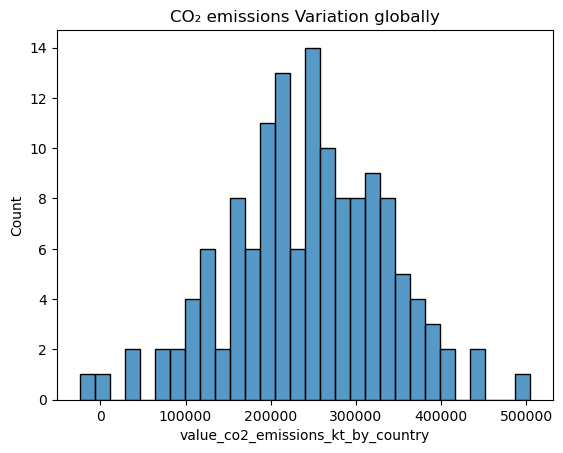

<Figure size 640x480 with 0 Axes>

In [43]:
sns.histplot(data=df_synthetic,x='value_co2_emissions_kt_by_country', bins = 30)
plt.title('CO₂ emissions Variation globally')
plt.show()
plt.savefig('Q24 CO₂ emissions')

## 25. You use a KDE curve to show the distribution of renewable shares.

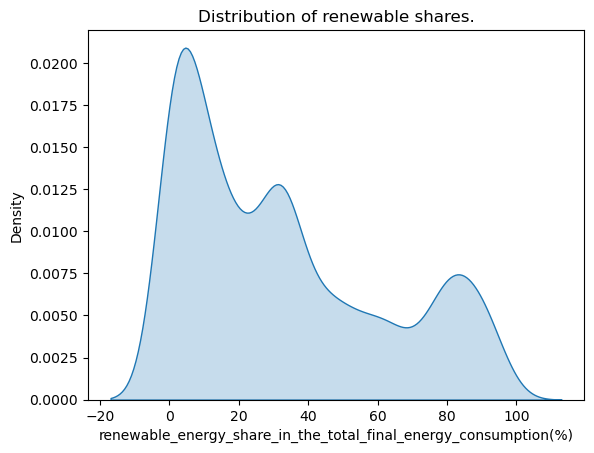

<Figure size 640x480 with 0 Axes>

In [44]:
sns.kdeplot(data=df_filled,x='renewable_energy_share_in_the_total_final_energy_consumption(%)', fill=True)
plt.title('Distribution of renewable shares.')
plt.show()
plt.savefig('Q25 Distribution of renewable shares')

## 26. You compare renewable growth trajectories over time for three nations.

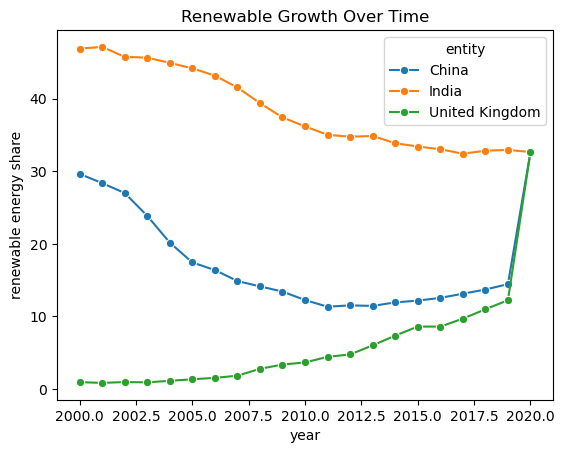

<Figure size 640x480 with 0 Axes>

In [45]:
isolated_records = df_filled[df_filled['entity'].isin(['India', 'China', 'United Kingdom'])]
sns.lineplot(data=isolated_records, x='year', y='renewable_energy_share_in_the_total_final_energy_consumption(%)',hue='entity',marker='o')
plt.title('Renewable Growth Over Time')
plt.ylabel('renewable energy share')
plt.show()
plt.savefig('Q26 Renewable Growth Over Time')

## 27. You visualize average GDP per capita for the top 10 countries.

In [46]:
top_10 = df_filled.groupby('entity')['gdp_per_capita'].mean().reset_index()
top_10 = top_10.sort_values(by='gdp_per_capita', ascending=False).head(10)
top_10

,entity,gdp_per_capita
93,Luxembourg,97804.120900
19,Bermuda,92947.173080
118,Norway,74566.625004
154,Switzerland,71247.825336
30,Cayman Islands,60775.882905
129,Qatar,59167.671117
76,Ireland,54848.812425
43,Denmark,53023.626530
72,Iceland,52057.283799
168,United States,50076.813150


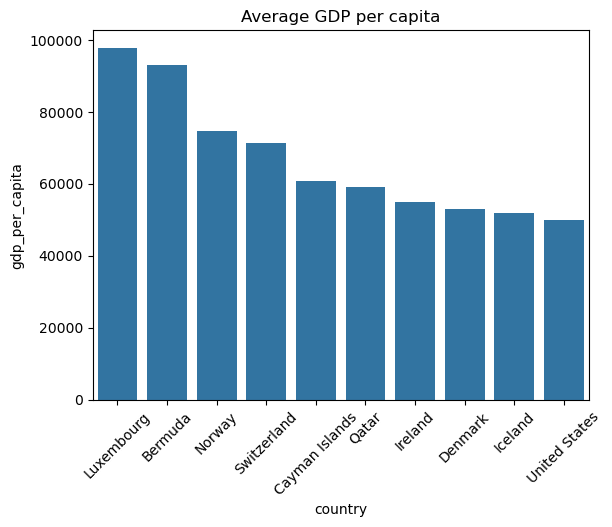

<Figure size 640x480 with 0 Axes>

In [47]:
sns.barplot(data=top_10, x='entity', y='gdp_per_capita')
plt.xlabel('country')
plt.xticks(rotation=45)
plt.title('Average GDP per capita')
plt.show()
plt.savefig('Q27 Average GDP per capita of Top 10 Countries')

## 28. You boxplot GDP based on electricity access segments to uncover inequality.

In [48]:
df_filled['access_segments'] = df_filled['access_to_electricity(% of population)'].apply(lambda x: 'High' if x>80 else ('Medium' if x>50 else 'Low'))

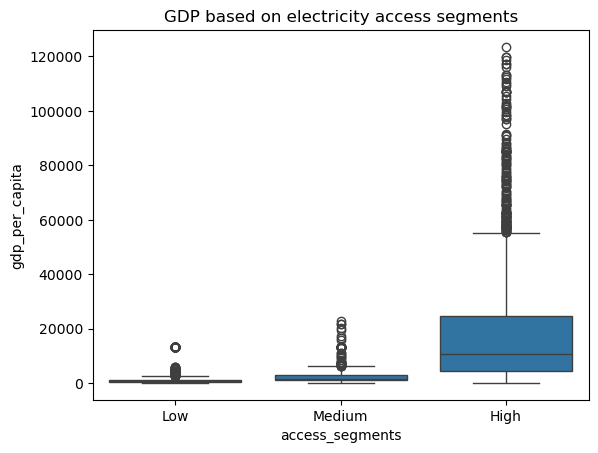

<Figure size 640x480 with 0 Axes>

In [49]:
sns.boxplot(data = df_filled, x='access_segments', y='gdp_per_capita')
plt.title('GDP based on electricity access segments')
plt.show()
plt.savefig('Q28 GDP based on electricity access segments')

## -Relationships & Patterns

## 29. You chart GDP vs. renewable share to test if wealth enables cleaner energy.

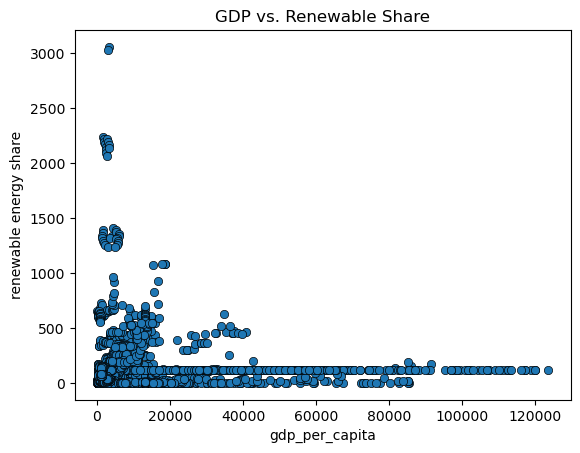

<Figure size 640x480 with 0 Axes>

In [50]:
sns.scatterplot(data=df_filled, x='gdp_per_capita', y='renewable_electricity_generating_capacity_per_capita', edgecolor='black')
plt.title('GDP vs. Renewable Share')
plt.ylabel('renewable energy share')
plt.show()
plt.savefig('Q29 GDP vs Renewable Share')

## 30. You display CO₂ vs. primary energy use to expose emission efficiency.

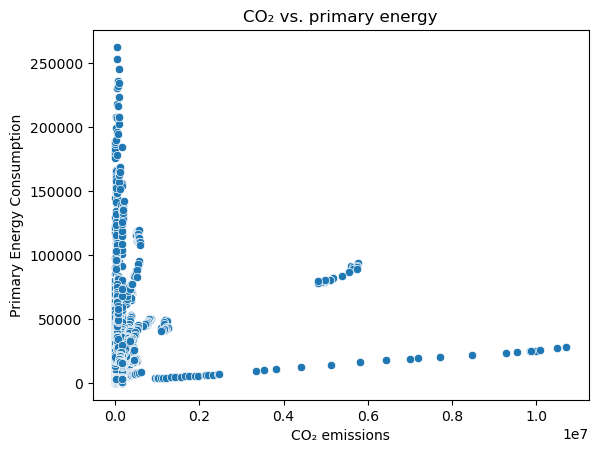

<Figure size 640x480 with 0 Axes>

In [51]:
sns.scatterplot(data=df_filled, x='value_co2_emissions_kt_by_country', y='primary_energy_consumption_per_capita(kWh/person)')
plt.title('CO₂ vs. primary energy')
plt.xlabel('CO₂ emissions')
plt.ylabel('Primary Energy Consumption')
plt.show()
plt.savefig('Q30 CO₂ vs primary energy')

## 31. You build a correlation heatmap for all energy metrics to spot strong links.

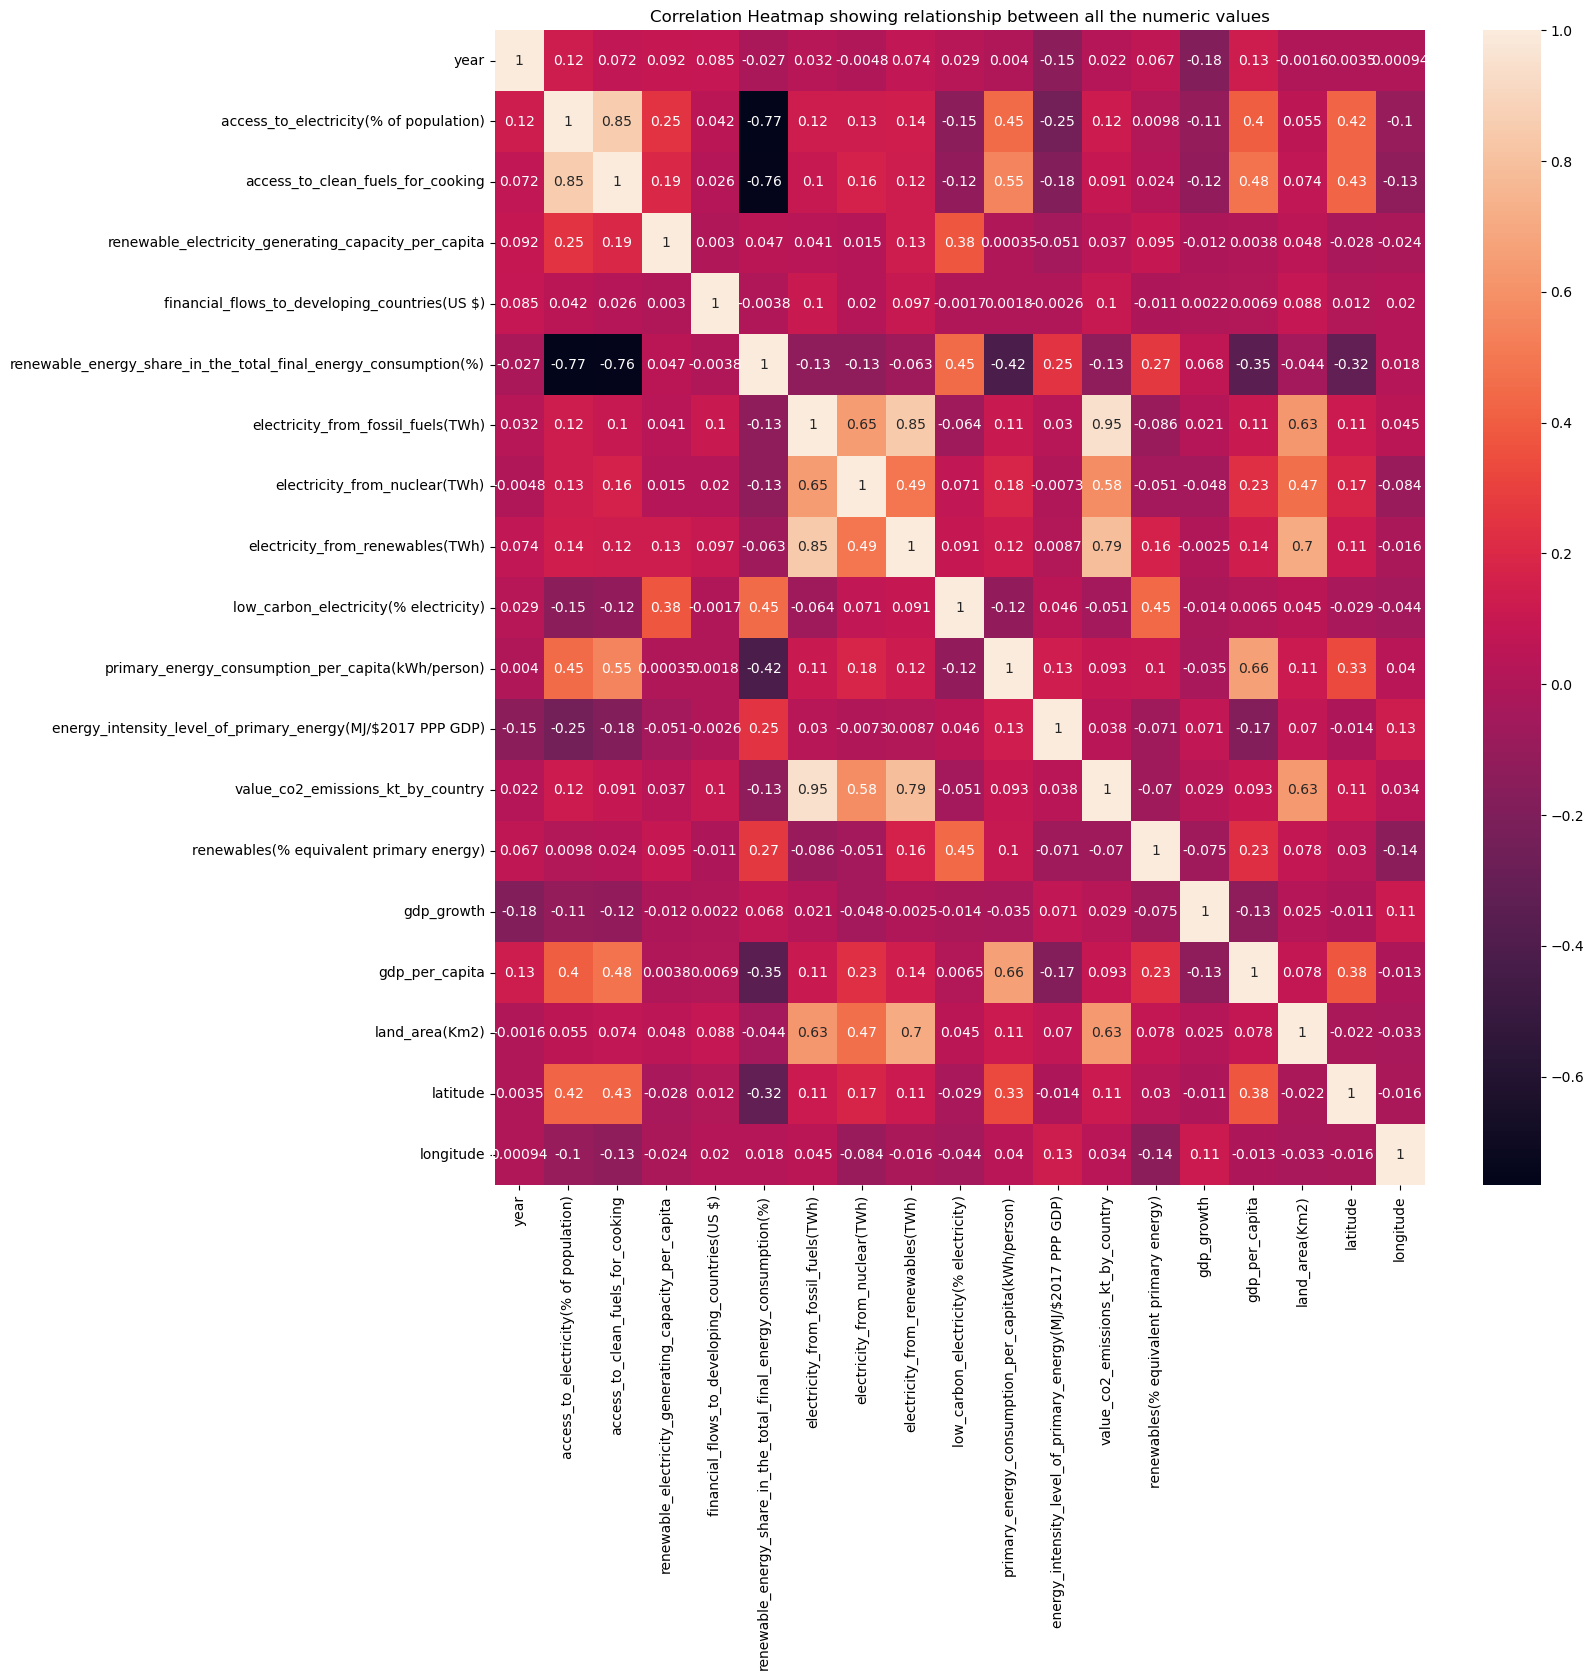

<Figure size 640x480 with 0 Axes>

In [55]:
plt.figure(figsize = (15,15))
sns.heatmap(data=df_filled.select_dtypes(['int', 'float']).corr(), annot=True )
plt.title("Correlation Heatmap showing relationship between all the numeric values")
plt.show()
plt.savefig('Q31 Correlation Heatmap')

## 32. You create a pairplot with GDP, access, and emissions for holistic comparison.

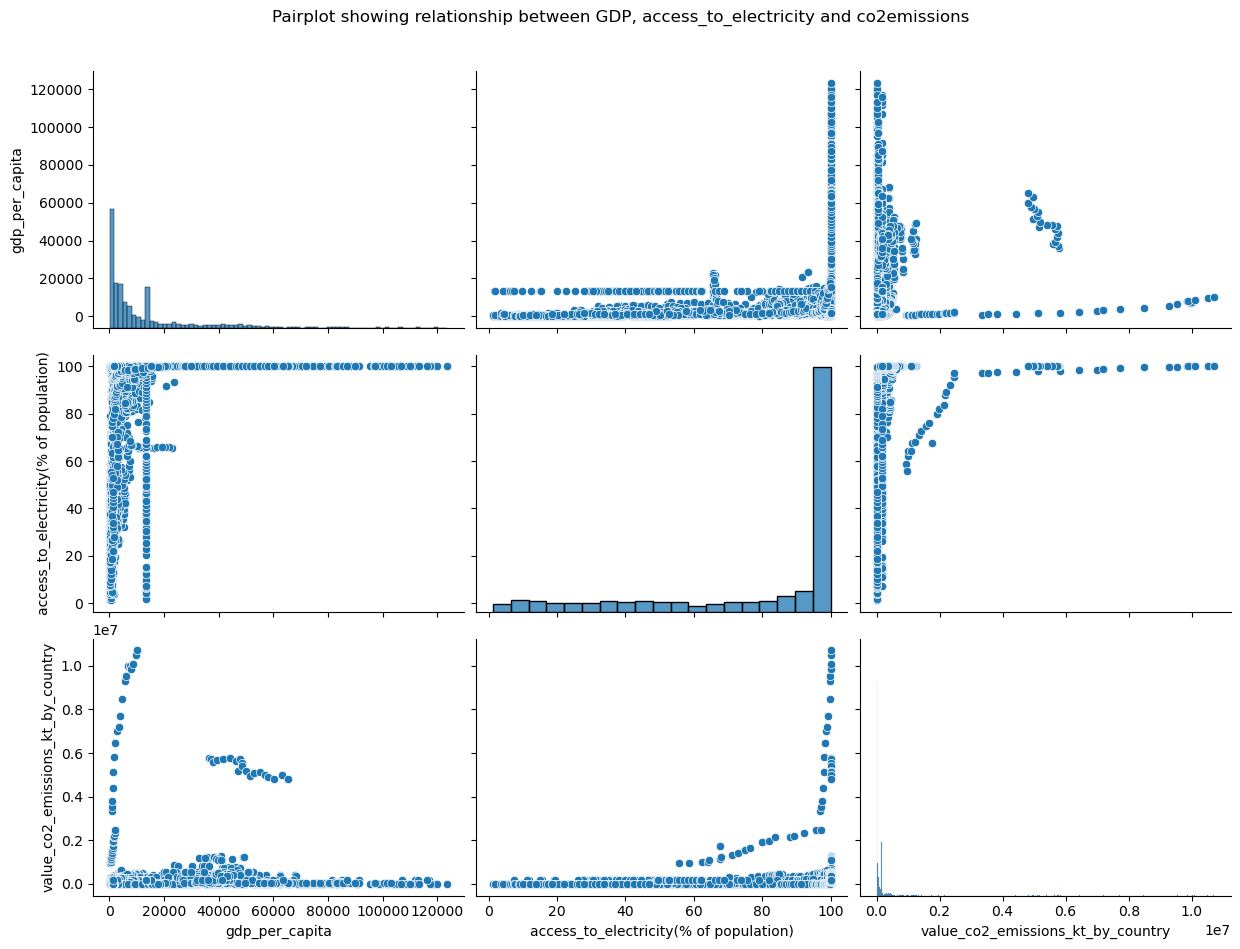

<Figure size 640x480 with 0 Axes>

In [74]:
sns.pairplot(data = df_filled[['gdp_per_capita', 'access_to_electricity(% of population)', 'value_co2_emissions_kt_by_country']], height=3, aspect=1.4)
plt.suptitle("Pairplot showing relationship between GDP, access_to_electricity and co2emissions", y=1.05)
plt.show()
plt.savefig("Q32 Pairplot with GDP, access, and emissions")

## 33. You use a violin plot to see how energy intensity varies by region.

In [80]:
pip install country_converter

Note: you may need to restart the kernel to use updated packages.


In [87]:
import country_converter as coco

cc=coco.CountryConverter()

df_filled['continent'] = cc.convert(names=df_filled['entity'], to='continent')
df_filled

,entity,year,access_to_electricity(% of population),access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,financial_flows_to_developing_countries(US $),renewable_energy_share_in_the_total_final_energy_consumption(%),electricity_from_fossil_fuels(TWh),electricity_from_nuclear(TWh),electricity_from_renewables(TWh),...,value_co2_emissions_kt_by_country,renewables(% equivalent primary energy),gdp_growth,gdp_per_capita,density\n(P/Km2),land_area(Km2),latitude,longitude,access_segments,continent
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,760.000000,11.986707,3.441610,13283.774348,60,652230.0,33.939110,67.709953,Low,Asia
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,730.000000,11.986707,3.441610,13283.774348,60,652230.0,33.939110,67.709953,Low,Asia
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,1029.999971,11.986707,3.441610,179.426579,60,652230.0,33.939110,67.709953,Low,Asia
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,1220.000029,11.986707,8.832278,190.683814,60,652230.0,33.939110,67.709953,Low,Asia
4,Afghanistan,2004,20.064968,10.9,7.75,94224000.0,44.24,0.33,0.0,0.56,...,1029.999971,11.986707,1.414118,211.382074,60,652230.0,33.939110,67.709953,Low,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,11020.000460,11.986707,0.755869,1464.588957,38,390757.0,-19.015438,29.154857,Low,Africa
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,10340.000150,11.986707,4.709492,1235.189032,38,390757.0,-19.015438,29.154857,Low,Africa
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,12380.000110,11.986707,4.824211,1254.642265,38,390757.0,-19.015438,29.154857,Low,Africa
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,11760.000230,11.986707,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857,Low,Africa


C:\Users\AjayGangwani\AppData\Local\Temp\ipykernel_10044\569813598.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filled, x='continent', y='energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP)', inner='box', palette='Set2')


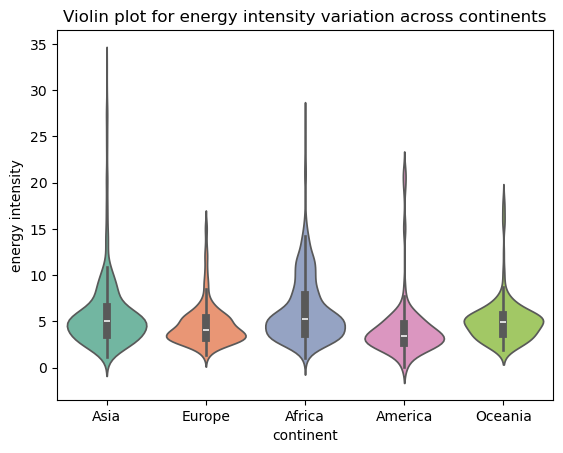

In [90]:
sns.violinplot(data=df_filled, x='continent', y='energy_intensity_level_of_primary_energy(MJ/$2017 PPP GDP)', inner='box', palette='Set2')
plt.ylabel('energy intensity')
plt.title('Violin plot for energy intensity variation across continents')
plt.savefig('Q33 Violin plot for energy intensity variation across continents')

## Subplots & Layout Customization

## 34. You use FacetGrid to show electricity access evolution by continent

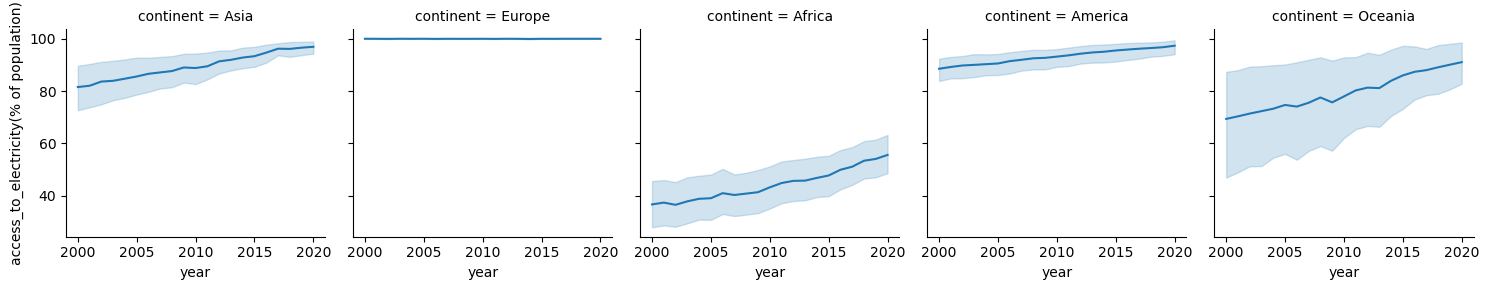

In [97]:
g= sns.FacetGrid(data=df_filled, col='continent')
g.map(sns.lineplot, 'year', 'access_to_electricity(% of population)')